In [2]:
import cv2
from darkflow.net.build import TFNet

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format == "svg"

In [6]:
options = {
    "model": "cfg/tiny-yolo-voc.cfg",
    "load": "bin/yolov2-tiny-voc.weights",
    "threshold": 0.3
}

tfnet = TFNet(options)

C:\Users\Ivan\For_YOLO\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2-tiny-voc.cfg not found, use cfg/tiny-yolo-voc.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/tiny-yolo-voc.cfg
Loading bin/yolov2-tiny-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.15799522399902344s
Model has a VOC model name, loading VOC labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x

In [23]:
img = cv2.imread("person.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = tfnet.return_predict(img)

print(img.shape)
result

(424, 640, 3)


[{'label': 'horse',
  'confidence': 0.44074473,
  'topleft': {'x': 416, 'y': 124},
  'bottomright': {'x': 594, 'y': 320}},
 {'label': 'person',
  'confidence': 0.7669174,
  'topleft': {'x': 177, 'y': 104},
  'bottomright': {'x': 283, 'y': 373}},
 {'label': 'sheep',
  'confidence': 0.3826038,
  'topleft': {'x': 76, 'y': 264},
  'bottomright': {'x': 186, 'y': 350}}]

In [26]:
tl0 = (result[0]["topleft"]['x'], result[0]["topleft"]['y'])
br0 = (result[0]["bottomright"]['x'], result[0]["bottomright"]['y'])
label0 = (result[0]["label"])

tl1 = (result[1]["topleft"]['x'], result[1]["topleft"]['y'])
br1 = (result[1]["bottomright"]['x'], result[1]["bottomright"]['y'])
label1 = (result[1]["label"])

tl2 = (result[2]["topleft"]['x'], result[2]["topleft"]['y'])
br2 = (result[2]["bottomright"]['x'], result[2]["bottomright"]['y'])
label2 = (result[2]["label"])

print("label0: ", label0)
print("topleft0: ",tl0)
print("bottomright0: ",br0)

print("label1: ", label1)
print("topleft1: ",tl1)
print("bottomright1: ",br1)

print("label2: ", label2)
print("topleft2: ",tl2)
print("bottomright2: ",br2)

label0:  horse
topleft0:  (416, 124)
bottomright0:  (594, 320)
label1:  person
topleft1:  (177, 104)
bottomright1:  (283, 373)
label2:  sheep
topleft2:  (76, 264)
bottomright2:  (186, 350)


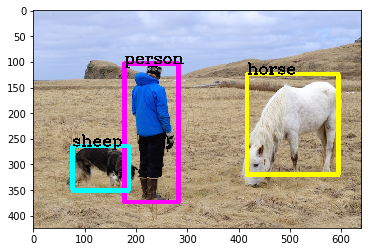

In [27]:
img = cv2.rectangle(img, tl0, br0, (255,255,0), 7)
img = cv2.rectangle(img, tl1, br1, (255,0,255), 7)
img = cv2.rectangle(img, tl2, br2, (0,255,255), 7)

img = cv2.putText(img, label0, tl0, cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0), 2)
img = cv2.putText(img, label1, tl1, cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0), 2)
img = cv2.putText(img, label2, tl2, cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0), 2)

plt.imshow(img)
plt.show()

In [ ]:
Видос по этой теме:
https://www.youtube.com/watch?v=fSM6cdFQdwI&t=352s&list=LLrue9azKU1H5MqKoPsX_m8w&index=2